In [1]:
import pyforest
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as st

## Q1.Use GQ test to check for the presence of heteroskedasticity.

## LOAD DATASET
### The following data on consumption-expenditure and income of 20 families (in ‘000 rupees):

In [25]:
d= pd.read_csv("C:/Users/Akash/Desktop/Mayukh sir practical/assignment2/a2d1.csv")
d

<IPython.core.display.Javascript object>

,Income,Con-exp
0,22.3,19.9
1,32.3,31.2
2,36.6,31.8
3,12.1,12.1
4,42.3,40.7
5,6.2,6.1
6,44.7,38.6
7,26.1,25.5
8,10.3,10.3
9,40.2,38.8


### SORT THE DATA-SET BASED ON INCOME 

In [30]:
d1=data.sort_values("Income")
d1

,Income,Con-exp
5,6.2,6.1
10,8.1,8.0
8,10.3,10.3
3,12.1,12.1
13,14.1,13.1
14,16.4,14.8
18,18.2,17.9
19,20.1,19.8
0,22.3,19.9
15,24.1,21.6


### HERE, INDEPENDENT COVARIATE IS INCOME(x) AND DEPENDENT VARIABLE IS CONSUMPTION-EXPENDITURE(y)

In [31]:
x=data1["Income"]
print(x)
y=data1["Con-exp"]
print(y)

5      6.2
10     8.1
8     10.3
3     12.1
13    14.1
14    16.4
18    18.2
19    20.1
0     22.3
15    24.1
7     26.1
17    28.3
16    30.1
1     32.3
11    34.5
2     36.6
12    38.0
9     40.2
4     42.3
6     44.7
Name: Income, dtype: float64
5      6.1
10     8.0
8     10.3
3     12.1
13    13.1
14    14.8
18    17.9
19    19.8
0     19.9
15    21.6
7     25.5
17    25.0
16    29.3
1     31.2
11    33.1
2     31.8
12    33.5
9     38.8
4     40.7
6     38.6
Name: Con-exp, dtype: float64


### PERFORMING SIMPLE LINEAR REGREESION EQUATION USING STATS MODEL


In [32]:
x_const=sm.add_constant(x)
model=sm.OLS(y,x_const)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Con-exp   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 30 May 2022   Prob (F-statistic):           4.00e-18
Time:                        23:58:56   Log-Likelihood:                -32.785
No. Observations:                  20   AIC:                             69.57
Df Residuals:                      18   BIC:                             71.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8471      0.703      1.204      0.2

In [33]:
y_pred= result.predict(x_const)
y_pred

5      6.422865
10     8.131582
8     10.110096
3     11.728880
13    13.527530
14    15.595977
18    17.214761
19    18.923478
0     20.901992
15    22.520777
7     24.319426
17    26.297940
16    27.916725
1     29.895239
11    31.873753
2     33.762335
12    35.021390
9     36.999904
4     38.888486
6     41.046865
dtype: float64

In [34]:
res= y-y_pred
print(res)

5    -0.322865
10   -0.131582
8     0.189904
3     0.371120
13   -0.427530
14   -0.795977
18    0.685239
19    0.876522
0    -1.001992
15   -0.920777
7     1.180574
17   -1.297940
16    1.383275
1     1.304761
11    1.226247
2    -1.962335
12   -1.521390
9     1.800096
4     1.811514
6    -2.446865
dtype: float64


### RESIDUAL PLOT ON INDEPENDENT VARIABLE VS RESIUAL

<IPython.core.display.Javascript object>

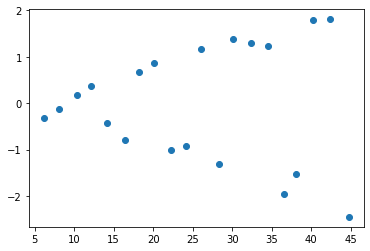

In [35]:
plt.scatter(x,res)

#### OBSERED FANNEL SHAPED DIAGRAM i.e HETEROSKEDASTICITY IS PRESENT. NEXT, WE PERFORMED GQ-TEST TO ENSURE PRESENCE OF HETEROSKEDASTICITY

In [36]:
c=4
smallest = data1[:8]
#print(smallest)
print(smallest["Income"])

5      6.2
10     8.1
8     10.3
3     12.1
13    14.1
14    16.4
18    18.2
19    20.1
Name: Income, dtype: float64


In [37]:
x1_const=sm.add_constant(smallest["Income"])
model1= sm.OLS(smallest["Con-exp"],x1_const)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                Con-exp   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     481.2
Date:                Mon, 30 May 2022   Prob (F-statistic):           5.86e-07
Time:                        23:59:01   Log-Likelihood:                -5.5874
No. Observations:                   8   AIC:                             15.17
Df Residuals:                       6   BIC:                             15.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2350      0.605      0.389      0.7

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
y1_pred= result1.predict(x1_const)
y1=smallest["Con-exp"]
res1=y1-y1_pred

In [39]:
Res1 = res1**2
ssr1 = Res1.sum()
print(ssr1)

1.8934714887358706


In [40]:
largest = data1[-8:]
largest


,Income,Con-exp
16,30.1,29.3
1,32.3,31.2
11,34.5,33.1
2,36.6,31.8
12,38.0,33.5
9,40.2,38.8
4,42.3,40.7
6,44.7,38.6


In [41]:
x2_const = sm.add_constant(largest["Income"])
mod = sm.OLS(largest["Con-exp"],x2_const)
result2 = mod.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                Con-exp   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     30.00
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00155
Time:                        23:59:05   Log-Likelihood:                -15.076
No. Observations:                   8   AIC:                             34.15
Df Residuals:                       6   BIC:                             34.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0938      5.250      1.161      0.2

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
y_pred2 = result2.predict(x2_const)
res2 = (largest["Con-exp"]-y_pred2)
Res2 = res2**2
ssr2 = Res2.sum()
ssr2

20.299525511488298

In [45]:
F_obs=ssr2/ssr1
print(F_obs)

10.720798085552783


In [46]:
F_critical=st.f.ppf(0.95,6,6)
print(F_critical)

4.283865713822639


In [47]:
if(F_obs>F_critical):
  print("we reject H0 i.e heteroskedasticity is present")
else:
  print("we accept H0 i.e homoskedasticity is present")

we reject H0 i.e heteroskedasticity is present


## Q2.If heteroskedasticity is present, use any simple model for the error-variance to obtain better estimates of the parameters.

### PERFORMING GLS TO OBTAIN BETTER ESTIMATOR OF THE PARAMETERS

In [48]:
x_const = sm.add_constant(x)
model3 = sm.GLS(y,x_const)
result3 = model3.fit()
print(result3.summary())

                            GLS Regression Results                            
Dep. Variable:                Con-exp   R-squared:                       0.986
Model:                            GLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 30 May 2022   Prob (F-statistic):           4.00e-18
Time:                        23:59:55   Log-Likelihood:                -32.785
No. Observations:                  20   AIC:                             69.57
Df Residuals:                      18   BIC:                             71.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8471      0.703      1.204      0.2

## B)Q1. Use Glejser test to check for the presence of heteroskedasticity.

### LOAD DATA-SET
### The following data are on speed (sp) of a car and distance (dis) it covers to come to a standstill.

In [50]:
data2= pd.read_csv("C:/Users/Akash/Desktop/Mayukh sir practical/assignment2/a2d2.csv")
data2.head()

<IPython.core.display.Javascript object>

,dis,sp
0,4,4
1,2,5
2,4,5
3,8,5
4,8,5


### HERE SPEED OF CAR IS INDEPENDENT VARIABLE(x) and DISTANCE IS DEPENDENT VARIABLE(y)

In [51]:
x = data2["sp"]
y = data2["dis"]

### PERFORMING OLS

In [52]:
x_const = sm.add_constant(x)
mod = sm.OLS(y,x_const)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    dis   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     408.6
Date:                Tue, 31 May 2022   Prob (F-statistic):           6.13e-28
Time:                        00:02:36   Log-Likelihood:                -232.96
No. Observations:                  60   AIC:                             469.9
Df Residuals:                      58   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.4174      3.345     -6.105      0.0

In [53]:
parameters = result.params
intercept = parameters.const
slope = parameters.sp
print("Intercepts: ", intercept)
print("Slope: ",slope)

Intercepts:  -20.41742046782962
Slope:  3.151528220726599


In [54]:
y_pred=result.predict(x_const)
y_pred.head()

0   -7.811308
1   -4.659779
2   -4.659779
3   -4.659779
4   -4.659779
dtype: float64

In [55]:
res2= y- y_pred
res2.head()

0    11.811308
1     6.659779
2     8.659779
3    12.659779
4    12.659779
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'X vs Residual plot')

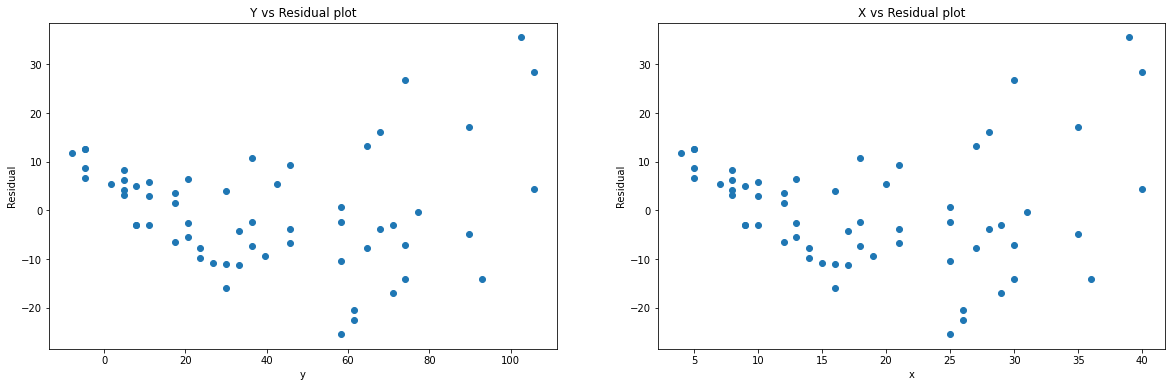

In [58]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.scatter(y_pred,res2)
plt.xlabel("y")
plt.ylabel("Residual")
plt.title("Y vs Residual plot")

plt.subplot(1,2,2)
plt.scatter(x,res2)
plt.xlabel("x")
plt.ylabel("Residual")
plt.title("X vs Residual plot")

In [60]:
RES=np.absolute(res2)
#1 |ei| = b0+b1.sqrt(1/xi)+Vi
#2 |ei| = b0+b1.sqrt(xi)+Vi
#3 |ei| = b0+b1.(1/xi)+Vi

<IPython.core.display.Javascript object>

In [61]:
x11_const = sm.add_constant(np.sqrt(1/x))
model11 = sm.OLS(RES,x11_const)
result11 = mod.fit()
print(result11.summary())

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:                    dis   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     408.6
Date:                Tue, 31 May 2022   Prob (F-statistic):           6.13e-28
Time:                        00:03:40   Log-Likelihood:                -232.96
No. Observations:                  60   AIC:                             469.9
Df Residuals:                      58   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.4174      3.345     -6.105      0.0

In [62]:
x22_const=sm.add_constant(1/x)
model22= sm.OLS(RES,x22_const)
result22=model22.fit()
print(result22.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.880
Date:                Tue, 31 May 2022   Prob (F-statistic):             0.0951
Time:                        00:03:42   Log-Likelihood:                -202.75
No. Observations:                  60   AIC:                             409.5
Df Residuals:                      58   BIC:                             413.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5330      1.649      6.996      0.0

In [63]:
x33_const=sm.add_constant(np.sqrt(x))
model33= sm.OLS(RES,x33_const)
result33=model33.fit()
print(result33.summary())

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     11.43
Date:                Tue, 31 May 2022   Prob (F-statistic):            0.00130
Time:                        00:03:42   Log-Likelihood:                -198.80
No. Observations:                  60   AIC:                             401.6
Df Residuals:                      58   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3810      3.256     -0.424      0.6

In [64]:
slope11=result11.params.sp
print(slope11)


3.151528220726599


In [65]:
T_obs= slope11/ 0.156 
print(T_obs)

20.202103979016663


In [66]:
T_critical=st.t.ppf(0.95,58)
T_critical

1.671552762153672

In [67]:
if(T_obs>T_critical):
  print("WE REJECT H0 i.e HETEROSKEDASTICITY IS PRESENT")
else:
  print("WE ACCEPECT H0 i.e HETEROSKEDASTICITY IS NOT PRESENT ")

WE REJECT H0 i.e HETEROSKEDASTICITY IS PRESENT


## REMEDY

### TRANSFORMING Y --> LOG Y

In [68]:
y_log = np.log(y)

<IPython.core.display.Javascript object>

### PERFORMING GLS

In [69]:
x44_const = sm.add_constant(x)
model5 = sm.GLS(y_log,x44_const)
result5 = model5.fit()
print(result5.summary())

                            GLS Regression Results                            
Dep. Variable:                    dis   R-squared:                       0.865
Model:                            GLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     370.5
Date:                Tue, 31 May 2022   Prob (F-statistic):           7.27e-27
Time:                        00:03:48   Log-Likelihood:                -24.427
No. Observations:                  60   AIC:                             52.85
Df Residuals:                      58   BIC:                             57.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4977      0.103     14.471      0.0

In [70]:
y_pred_gls = result5.predict(x44_const)

res_gls = (y_log - y_pred_gls)
res_gls.head()

0   -0.482895
1   -1.268910
2   -0.575763
3    0.117384
4    0.117384
dtype: float64

### Confirming that our new gls model's error terms are homoskedastic using BP Test

In [71]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
lmstat, pvalue , fvalue , fpvalue = sms.het_breuschpagan(res_gls, x44_const)
print("The p value of our test is {:.2f}".format(pvalue))


if pvalue<=0.05:
    print("Our data is heteroscedastic")
else:
    print("We accept the null hypothesis\nOur errors are Homoscedastic")

The p value of our test is 0.06
We accept the null hypothesis
Our errors are Homoscedastic
